# Exercise 2.5 Task

## 01 - 02. Import Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import Data

df = pd.read_csv('newyork_data.csv', index_col = 0)

## 03. Data Preprocessing

In [3]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,both
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,both
5,5E7C60D8C322436D,classic_bike,2022-01-13 18:46:20,2022-01-13 19:17:32,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,both
6,20F859440531F682,classic_bike,2022-01-06 13:25:34,2022-01-06 14:22:48,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,casual,2022-01-06,4.9,both
7,1D3BB04281B26554,classic_bike,2022-01-16 16:41:23,2022-01-16 17:56:50,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-16,-8.0,both
8,B66A3E56C3986AD1,electric_bike,2022-01-07 16:31:32,2022-01-07 16:46:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-07,0.7,both
9,1DC82BF92F17409F,electric_bike,2022-01-17 10:50:23,2022-01-17 11:05:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-17,3.9,both


In [6]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [7]:
df_group

,start_station_name,end_station_name,value
0,11 St & Washington St,11 St & Washington St,1132
1,11 St & Washington St,12 Ave & W 40 St,1
2,11 St & Washington St,12 St & Sinatra Dr N,253
3,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,395
4,11 St & Washington St,4 St & Grand St,350
...,...,...,...
6948,York St & Marin Blvd,Van Vorst Park,18
6949,York St & Marin Blvd,Warren St,42
6950,York St & Marin Blvd,Washington St,16
6951,York St & Marin Blvd,Willow Ave & 12 St,1


In [8]:
print(df_group['value'].sum())
print(df.shape)

892281
(895485, 17)


In [9]:
df_group['value'].describe()

count    6953.000000
mean      128.330361
std       304.091182
min         1.000000
25%         7.000000
50%        28.000000
75%       118.000000
max      5565.000000
Name: value, dtype: float64

In [10]:
# Rename column

df_group.rename(columns = {'value': 'trips'}, inplace = True)

In [11]:
df_group

,start_station_name,end_station_name,trips
0,11 St & Washington St,11 St & Washington St,1132
1,11 St & Washington St,12 Ave & W 40 St,1
2,11 St & Washington St,12 St & Sinatra Dr N,253
3,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,395
4,11 St & Washington St,4 St & Grand St,350
...,...,...,...
6948,York St & Marin Blvd,Van Vorst Park,18
6949,York St & Marin Blvd,Warren St,42
6950,York St & Marin Blvd,Washington St,16
6951,York St & Marin Blvd,Willow Ave & 12 St,1


In [12]:
df_group['trips'].describe()

count    6953.000000
mean      128.330361
std       304.091182
min         1.000000
25%         7.000000
50%        28.000000
75%       118.000000
max      5565.000000
Name: trips, dtype: float64

### Exploratory Analysis for Trips

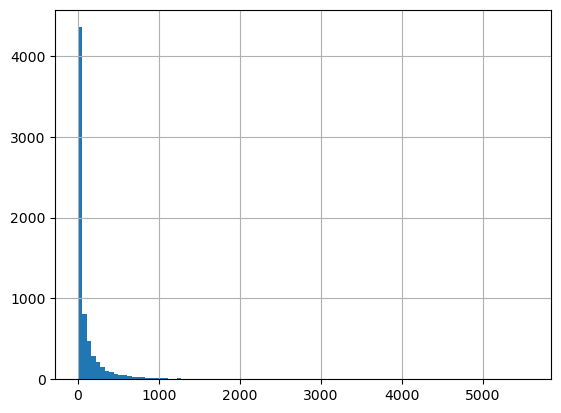

In [13]:
df_group['trips'].hist(bins = 100)
plt.show()

In [14]:
df_group['trips'].sort_index().value_counts()

trips
1       676
2       281
3       194
4       187
5       153
       ... 
1021      1
1229      1
571       1
429       1
234       1
Name: count, Length: 800, dtype: int64

In [15]:
df_group.to_csv('newyork_stationgroupby_final.csv')

In [16]:
df_group.head()

,start_station_name,end_station_name,trips
0,11 St & Washington St,11 St & Washington St,1132
1,11 St & Washington St,12 Ave & W 40 St,1
2,11 St & Washington St,12 St & Sinatra Dr N,253
3,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,395
4,11 St & Washington St,4 St & Grand St,350


In [17]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both,1
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,both,1
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,both,1
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both,1
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,both,1


### Merge Trip DataFrame with Main DataFrame

In [18]:
df_m = df.merge(
    df_group,
    how='left',
    on=['start_station_name', 'end_station_name']
)

In [19]:
df_m

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value,trips
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both,1,2952.0
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,both,1,655.0
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,both,1,655.0
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both,1,2952.0
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,both,1,2952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895480,D438F1622839AC50,classic_bike,2022-12-06 15:43:38,2022-12-06 15:53:57,Dey St,JC065,Riverview Park,JC057,40.737828,-74.067083,40.744319,-74.043991,member,2022-12-06,9.3,both,1,9.0
895481,747A63A8E782D171,electric_bike,2022-12-08 08:17:51,2022-12-08 08:23:33,9 St HBLR - Jackson St & 8 St,HB305,City Hall - Washington St & 1 St,HB105,40.747907,-74.038412,40.737360,-74.030970,casual,2022-12-08,11.6,both,1,668.0
895482,AE090858CFDE6E82,electric_bike,2022-12-23 14:10:07,2022-12-23 14:14:18,Mama Johnson Field - 4 St & Jackson St,HB404,City Hall - Washington St & 1 St,HB105,40.743140,-74.040041,40.737360,-74.030970,member,2022-12-23,7.5,both,1,500.0
895483,B3CC8E70AF4E259C,classic_bike,2022-12-02 04:43:25,2022-12-02 04:46:55,Mama Johnson Field - 4 St & Jackson St,HB404,City Hall - Washington St & 1 St,HB105,40.743135,-74.040080,40.737360,-74.030970,member,2022-12-02,3.4,both,1,500.0


In [18]:
print(df_m['trips'].sum())
print(df_m.shape)

757368243.0
(895485, 18)


In [19]:
df_m.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value,trips
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both,1,2952.0
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,both,1,655.0
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,both,1,655.0
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both,1,2952.0
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,both,1,2952.0


### Create smaller subset of df 

In [20]:
df_final = df_m[[
    'start_station_name',
    'end_station_name',
    'start_lat',
    'start_lng',
    'end_lat',
    'end_lng',
    'trips'
]].drop_duplicates(subset=['start_station_name', 'end_station_name'])

In [21]:
df_final.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trips
0,12 St & Sinatra Dr N,12 St & Sinatra Dr N,40.750604,-74.024020,40.750604,-74.024020,2952.0
1,Essex Light Rail,Essex Light Rail,40.712774,-74.036486,40.712774,-74.036486,655.0
29,12 St & Sinatra Dr N,Washington St,40.750604,-74.024020,40.724294,-74.035483,108.0
37,12 St & Sinatra Dr N,Essex Light Rail,40.750604,-74.024020,40.712774,-74.036486,22.0
43,Essex Light Rail,Washington St,40.712774,-74.036486,40.724294,-74.035483,210.0


## 04. Kepler.gl map

In [22]:
from ipywidgets import IntSlider
IntSlider()

IntSlider(value=0)

In [23]:
df_final.dtypes

start_station_name     object
end_station_name       object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
trips                 float64
dtype: object

In [24]:
df_final.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trips
0,12 St & Sinatra Dr N,12 St & Sinatra Dr N,40.750604,-74.024020,40.750604,-74.024020,2952.0
1,Essex Light Rail,Essex Light Rail,40.712774,-74.036486,40.712774,-74.036486,655.0
29,12 St & Sinatra Dr N,Washington St,40.750604,-74.024020,40.724294,-74.035483,108.0
37,12 St & Sinatra Dr N,Essex Light Rail,40.750604,-74.024020,40.712774,-74.036486,22.0
43,Essex Light Rail,Washington St,40.712774,-74.036486,40.724294,-74.035483,210.0


In [25]:
# Looking for missing values

df_final.isnull().sum()

start_station_name     1
end_station_name      83
start_lat              0
start_lng              0
end_lat               37
end_lng               37
trips                 83
dtype: int64

#### Dataframe clean up

In [26]:
# Replace NaNs in station name with an empty string

df_final['start_station_name'] = df_final['start_station_name'].fillna('Unknown Start Station')

In [27]:
# Replace NaNs in station name with an empty string

df_final['end_station_name'] = df_final['end_station_name'].fillna('Unknown End Station')

In [28]:
df_final.columns

Index(['start_station_name', 'end_station_name', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'trips'],
      dtype='object')

In [29]:
# Looking for missing values

df_final.isnull().sum()

start_station_name     0
end_station_name       0
start_lat              0
start_lng              0
end_lat               37
end_lng               37
trips                 83
dtype: int64

In [30]:
# Handling missing values in latitiude and longitude. Since we need those to properly map, I'm creating a new df without these

df_clean_final = df_final.replace([np.inf, -np.inf], np.nan)

In [31]:
# Drop rows missing coordinates

df_clean_final = df_final.dropna(subset=['end_lat', 'end_lng'])

In [32]:
# Looking for missing values

df_clean_final.isnull().sum()

start_station_name     0
end_station_name       0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
trips                 46
dtype: int64

In [33]:
# Drop rows missing trips

df_clean_final = df_final.dropna(subset=['trips'])

In [34]:
# Looking for missing values

df_clean_final.isnull().sum()

start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
trips                 0
dtype: int64

In [35]:
print(df_clean_final['trips'].sum())
print(df_clean_final.shape)

892281.0
(6953, 7)


#### Plotting the map

In [36]:
df_clean_final['trips'].value_counts()

trips
1.0       676
2.0       281
3.0       194
4.0       187
5.0       153
         ... 
1203.0      1
1614.0      1
2339.0      1
345.0       1
1185.0      1
Name: count, Length: 800, dtype: int64

In [37]:
df_clean_final.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trips
0,12 St & Sinatra Dr N,12 St & Sinatra Dr N,40.750604,-74.024020,40.750604,-74.024020,2952.0
1,Essex Light Rail,Essex Light Rail,40.712774,-74.036486,40.712774,-74.036486,655.0
29,12 St & Sinatra Dr N,Washington St,40.750604,-74.024020,40.724294,-74.035483,108.0
37,12 St & Sinatra Dr N,Essex Light Rail,40.750604,-74.024020,40.712774,-74.036486,22.0
43,Essex Light Rail,Washington St,40.712774,-74.036486,40.724294,-74.035483,210.0


In [38]:
# Create KeplerGl instance

m = KeplerGl(height = 700, data={"data_1": df_clean_final})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                       start_station_name          end_station_name  start_lat  \
0   …

### Updates made to map:
#### For the Start Filter: I removed color based on "Trips" filter. I also changed the start color to purple to differentiate from the stop color, which I changed to teal. 
#### For the Stop Filter: I unhid the end filter and removed color based on trips. 
#### I changed to show the arc of start to end and changed the colors to purple and teal
#### I added filter on trips and changed colors to purple and teal

### Most popular trips made: 
#### The most popular trips are from the start station of Hoboken Terminal - Hudson St and Hudson Pl with the end station of Hoboken Ave at Monmouth St, with the total trips being 5,565.

### Additional Impressions: 
#### There appears to be a lot of single ride trips, all over the city. A large chunk of data have start stations on one side of the Hudson River and end on the other side, which would suggest a lot of riders are using Citi Bikes to get aross the river. The data indicates that a majority of the rides start in Jersey City/Hoboken/New Jersey area and ride across the George Washington Bridge via the dedicated bike path to New York City/Manahattan. 

## 07. Creating a config

In [39]:
config = m.config

In [40]:
config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['data_1'],
     'id': 'k0z9c5tm',
     'name': ['trips'],
     'type': 'range',
     'value': [1, 5565],
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'view': 'side',
     'speed': 1,
     'enabled': True}],
   'layers': [{'id': 'x541nc',
     'type': 'point',
     'config': {'dataId': 'data_1',
      'label': 'start',
      'color': [146, 38, 190],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'start_lat', 'lng': 'start_lng'},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'str

In [41]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [42]:
m.save_to_html(file_name = 'New York Citi Bikes Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to New York Citi Bikes Bike Trips Aggregated.html!
